In [175]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [176]:
plt.rcParams['font.family'] = 'Helvetica'

In [177]:
#results_dir = '../results/assoc_contemp_lagged_ksu_lag3_months_2024-06-13_09_24_10.962396/'
#results_dir = '../results/bin_12months_slopeTrue_weeks_2024-06-11_12_37_11.943781/'
units = 'months'
model = 'assoc'

lag = 1

assert units == 'months'

if lag==1:
    results_dir = '../results/ksu_lag_1assoc_contemp_lagged_2024_months_2024-06-30_13_55_18.201130/'
elif lag==2:
    results_dir = '../results/ksu_lag_2assoc_contemp_lagged_2024_months_2024-06-30_14_04_46.630717/'
else:
    results_dir = '../results/ksu_lag_3assoc_contemp_lagged_2024_months_2024-06-30_14_06_02.309240/'
    
df = pd.read_csv(results_dir + model + '_df_' + units + '_all_primary.csv').rename(columns={'Unnamed: 0': 'category'})

annot_df = pd.read_csv(results_dir +'annot_' + model + '_df_' + units + '_all_primary.csv').rename(columns={'Unnamed: 0': 'category'})

In [178]:
annot_df

,category,FOK,Cowspiracy,Okja/WTH,TGC,YAWYE,All
0,Searches: `Plant based',NaN,NaN,NaN,NaN,NaN,NaN
1,Searches: `Vegan',NaN,NaN,NaN,NaN,NaN,NaN
2,Searches: `Vegetarian',NaN,NaN,NaN,NaN,NaN,NaN
3,Beef Demand,NaN,NaN,NaN,NaN,NaN,NaN
4,Pork Demand,NaN,NaN,NaN,NaN,NaN,NaN
5,Chicken Demand,NaN,NaN,NaN,NaN,NaN,NaN
6,StewartMilk,NaN,NaN,NaN,NaN,NaN,NaN
7,StewartPBMilk,NaN,NaN,NaN,NaN,NaN,NaN
8,Zhao,NaN,NaN,NaN,NaN,NaN,NaN
9,"Searches: `Vegan', Informative",NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
selected_rows = ['Beef Demand', 'Pork Demand', 'Chicken Demand']

In [180]:
if selected_rows:
    df = df.query('Outcome in @selected_rows')
    annot_df = annot_df.query('category in @selected_rows')

annot_df

,category,FOK,Cowspiracy,Okja/WTH,TGC,YAWYE,All
3,Beef Demand,NaN,NaN,NaN,NaN,NaN,NaN
4,Pork Demand,NaN,NaN,NaN,NaN,NaN,NaN
5,Chicken Demand,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
for col in annot_df.columns:
    if col == 'category':
        continue
    annot_df[col + '_an'] = annot_df[col]
    annot_df = annot_df.drop([col],axis=1)

/Users/thomasat/opt/miniconda3/envs/nhanes/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [182]:

df = df.rename(columns={'Outcome': 'category'})
df = df.merge(annot_df, on='category', how='inner')

In [183]:
df

,category,FOK_se,Cowspiracy_se,Okja/WTH_se,TGC_se,YAWYE_se,All_se,FOK_pe,Cowspiracy_pe,Okja/WTH_pe,...,Okja/WTH_pval,TGC_pval,YAWYE_pval,All_pval,FOK_an,Cowspiracy_an,Okja/WTH_an,TGC_an,YAWYE_an,All_an
0,Beef Demand,0.054284,0.051103,0.048332,0.040351,0.067044,0.048579,-0.044233,-0.035226,0.062463,...,0.197480,0.862557,0.569521,0.309562,NaN,NaN,NaN,NaN,NaN,NaN
1,Pork Demand,0.060874,0.057956,0.055174,0.047454,0.070263,0.055383,-0.010824,-0.021374,0.085843,...,0.121068,0.793168,0.927584,0.175459,NaN,NaN,NaN,NaN,NaN,NaN
2,Chicken Demand,0.051604,0.048525,0.045928,0.037910,0.065119,0.046155,-0.056623,-0.030899,0.027947,...,0.543437,0.206161,0.808640,0.876586,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
#intvns = ['FOK', 'Cowspiracy', 'Okja/WTH', 'TGC', 'All']
#intvns = ['FOK', 'Cowspiracy', 'Okja', 'WTH', 'TGC', 'All']

if lag == 1:
    intvns = ['FOK', 'Cowspiracy', 'Okja/WTH', 'TGC', 'YAWYE']

else:
    intvns = ['FOK', 'Cowspiracy', 'Okja/WTH', 'TGC']    
    
for intvn in intvns:
    df[intvn + '_ci_lower'] = df[intvn + '_pe'] - 1.96*df[intvn + '_se'] 
    df[intvn + '_ci_upper'] = df[intvn + '_pe'] + 1.96*df[intvn + '_se'] 

In [185]:
df = df.reindex(range(df.shape[0])[::-1])
data = df

In [186]:
outcomes = list(data['category'])
interventions = intvns
colors = ['blue', 'orange', 'green', 'purple', 'black']


In [187]:
for i, outcome in enumerate(outcomes):
    print(outcome)

Chicken Demand
Pork Demand
Beef Demand


In [188]:
#import math
#math.isnan(data['Cowspiracy_an'][0])

In [189]:
intvn_map = {'FOK': 'Forks Over Knives', 'TGC': 'The Game Changers',
            'Okja': 'Okja', 'Cowspiracy': 'Cowspiracy', 'WTH': 'What the Health',
            'Okja/WTH': 'What the Health / Okja', 'YAWYE': 'You Are What You Eat'}

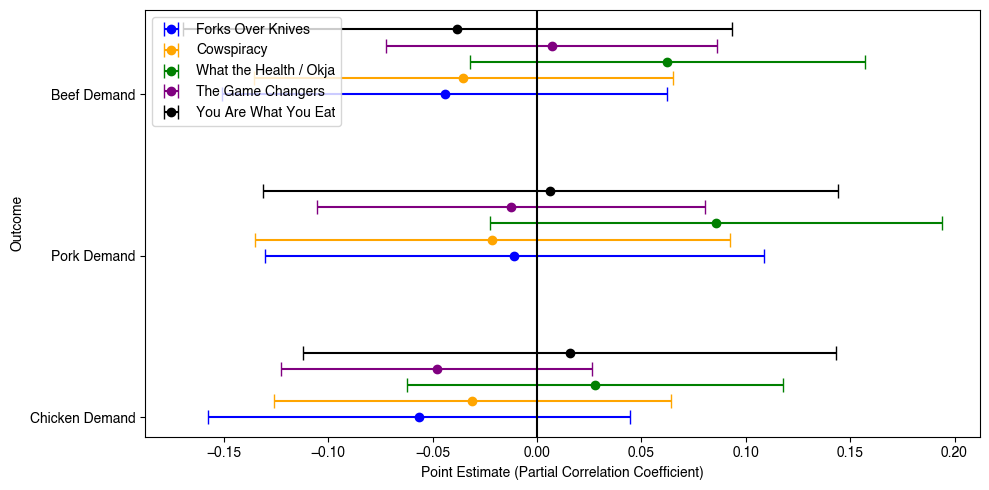

In [192]:
current_pos = 0
increment = 0.1
between_outcome_increment = 0.5

#fig, ax = plt.subplots(figsize=(10,5))
fig, ax = plt.subplots(figsize=(10,5))


for i, outcome in enumerate(outcomes):
    for j, intervention in enumerate(interventions):
        pe = list(data[intervention + '_pe'])[i] #data[outcome][intervention]['pe']
        ci_lower = list(data[intervention + '_ci_lower'])[i] #data[outcome][intervention]['ci_lower']
        ci_upper = list(data[intervention + '_ci_upper'])[i]#data[outcome][intervention]['ci_upper']
        xerr_lower = pe - ci_lower
        xerr_upper = ci_upper - pe
        
        if pe == 0.00000:
            if j == (len(interventions) - 1):
                #plt.axhline(current_pos, color='black')
                current_pos += between_outcome_increment
            
            continue
        
        # Adjust y-coordinate to add spacing between outcome groups
        #i*0.1 + j * 0.01 + i * outcome_spacing*0.1
        ax.errorbar(pe, current_pos, xerr=[[xerr_lower], [xerr_upper]], fmt='o', color=colors[j], capsize=5, label=intvn_map[intervention])
        annot = list(data[intervention + '_an'])[i]
        #print(intervention, i, annot, pe)
        if not isinstance(annot, float):
            #ax.annotate(annot, (pe, current_pos),size=15)
            plt.text(pe+0.02, current_pos-0.05, annot, size=15, color=colors[j])
        current_pos += increment
        
        #print(i, outcome, j, intervention)
        
        if j == (len(interventions) - 1):
            #plt.axhline(current_pos, color='black')
            current_pos += between_outcome_increment

#ax.set_ylim([0,0.5]) 

# Set y-ticks and labels
ax.set_yticks(np.arange(len(outcomes)))
ax.set_yticklabels(outcomes)

# Add legend
handles, labels = ax.get_legend_handles_labels()
unique_labels = {label: handle for handle, label in zip(handles, labels)}
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left')

plt.axvline(0, color='black')

ax.set_xlabel('Point Estimate (Partial Correlation Coefficient)') #
ax.set_ylabel('Outcome')

plt.tight_layout()
plt.show()